In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
df.duplicated().shape[0]

309

In [6]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [7]:
temp = df.copy()

In [8]:
temp.GENDER = temp.GENDER.replace({'M':'Male','F':'Female'})

In [9]:
for col in temp.columns:
    temp[col] = temp[col].replace({2:'YES',1:'NO'})

In [10]:
temp

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,Male,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,Female,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,Male,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,Female,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,NO,NO,NO,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,YES
305,Male,70,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,NO,YES,YES
306,Male,58,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,YES
307,Male,67,YES,NO,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES


In [27]:
posCase = temp[temp.LUNG_CANCER == 'YES']
posCase

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,Male,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
5,Female,75,NO,YES,NO,NO,YES,YES,YES,YES,NO,YES,YES,NO,NO,YES
6,Male,52,YES,NO,NO,NO,NO,YES,NO,YES,YES,YES,YES,NO,YES,YES
7,Female,51,YES,YES,YES,YES,NO,YES,YES,NO,NO,NO,YES,YES,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,NO,NO,NO,YES,YES,YES,NO,NO,YES,YES,YES,YES,NO,YES
305,Male,70,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,NO,YES,YES
306,Male,58,YES,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,YES
307,Male,67,YES,NO,YES,NO,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES


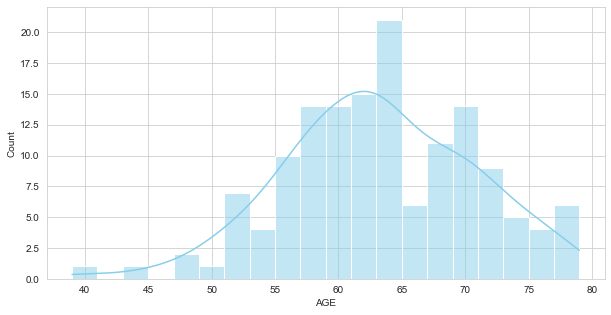

In [12]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.histplot(posCase[posCase.GENDER == 'Male']['AGE'], kde= True, color = 'skyblue',bins = 20)
plt.show();

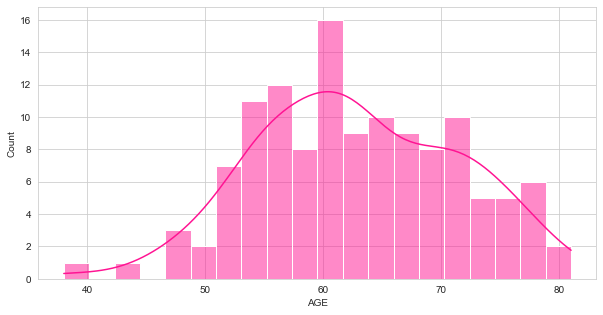

In [13]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.histplot(posCase[posCase.GENDER == 'Female']['AGE'],color = 'deeppink',kde=True,bins=20)
plt.show();

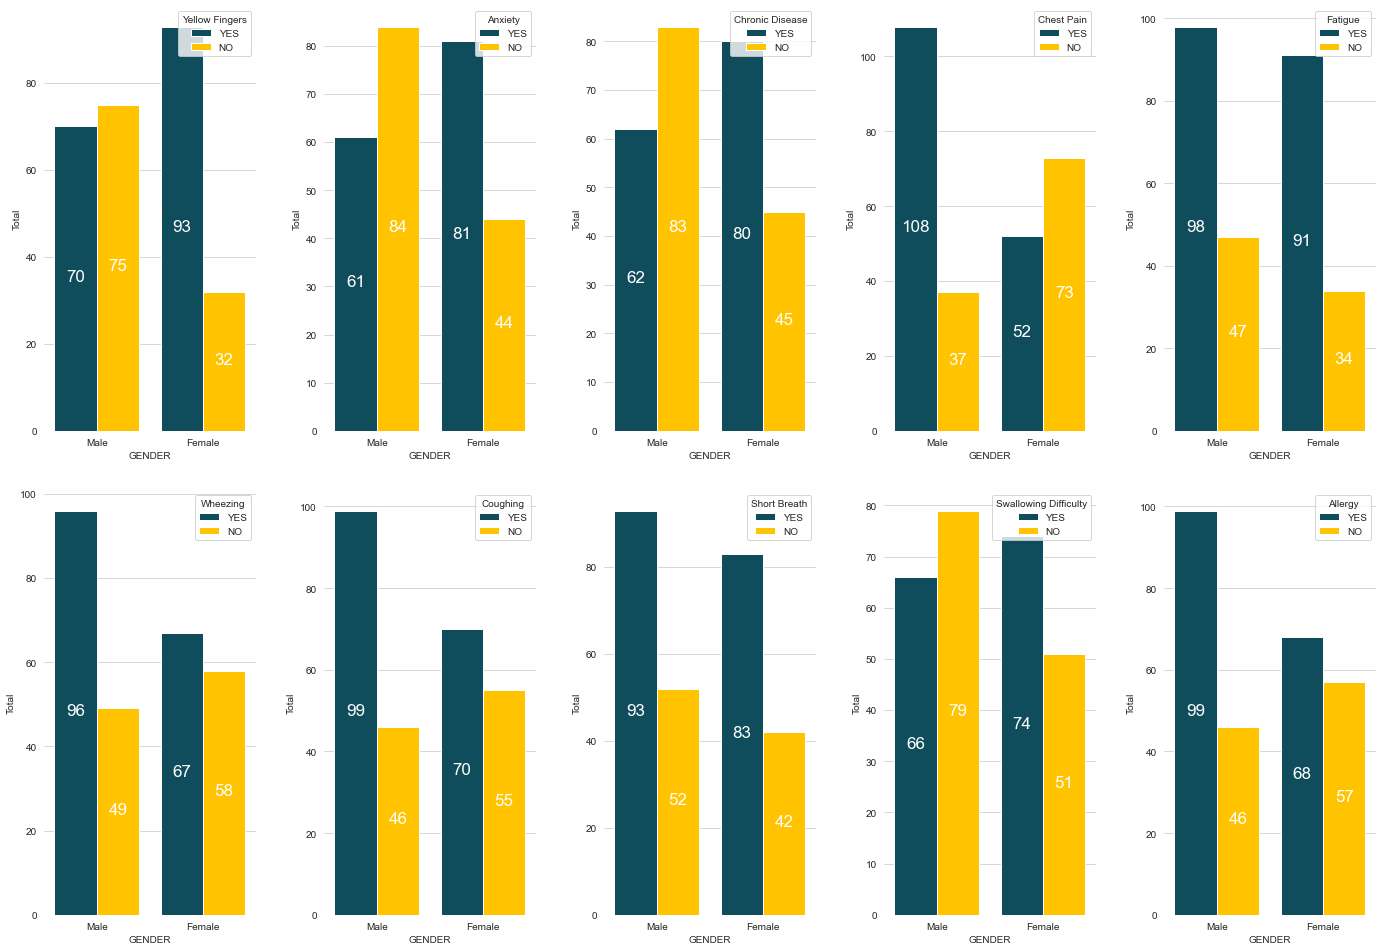

In [41]:
ret, axs = plt.subplots(2,5,figsize=(20,14))
plt.tight_layout(pad=4.0)

#YELLOW_FINGERS
sns.countplot(data=posCase,x="GENDER",hue="YELLOW_FINGERS",hue_order=["YES","NO"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white")

#ANXIETY
sns.countplot(data=posCase,x="GENDER",hue="ANXIETY",hue_order=["YES","NO"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white")

#CHRONIC DISEASE
sns.countplot(data=posCase,x="GENDER",hue="CHRONIC DISEASE",hue_order=["YES","NO"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white")

#CHEST PAIN
sns.countplot(data=posCase,x="GENDER",hue="CHEST PAIN",hue_order=["YES","NO"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white")

#FATIGUE
sns.countplot(data=posCase,x="GENDER",hue="FATIGUE ",hue_order=["YES","NO"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white")    

#WHEEZING
sns.countplot(data=posCase,x="GENDER",hue="WHEEZING",hue_order=["YES","NO"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white")

#COUGHING
sns.countplot(data=posCase,x="GENDER",hue="COUGHING",hue_order=["YES","NO"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white")
    
#SHORTNESS OF BREATH
sns.countplot(data=posCase,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["YES","NO"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white")
    
#SWALLOWING DIFFICULTY
sns.countplot(data=posCase,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["YES","NO"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white")

#ALLERGY
sns.countplot(data=posCase,x="GENDER",hue="ALLERGY ",hue_order=["YES","NO"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white")    
    
sns.despine(left=True, bottom=True)
plt.show()

In [15]:
le = LabelEncoder()
df["GENDER"] = df["GENDER"].replace({"M" : "Male" , "F" : "Female"})
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])

df = pd.get_dummies(df, columns= ["GENDER"])
df.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE"}, inplace=True)

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,FEMALE,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


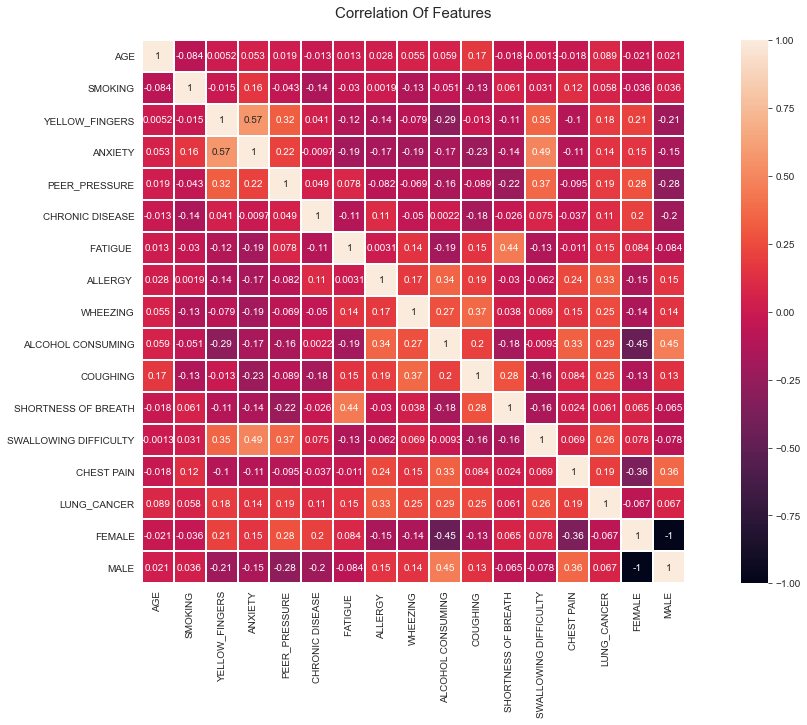

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), square=True, annot=True, vmin=-1, vmax=1, linewidths=0.1)
plt.title("Correlation Of Features\n", size=15)
plt.show()

In [17]:
x = df.drop("LUNG_CANCER", axis = 1)
y = df["LUNG_CANCER"]

In [18]:
x

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,FEMALE,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,0,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,0,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,0,1


In [19]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")

Confusion Matrix : 

[[ 5  2]
 [ 1 85]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



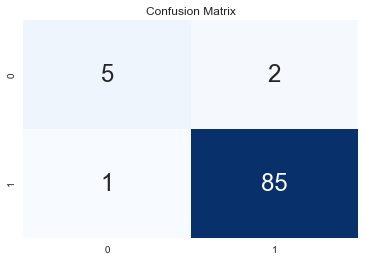

In [23]:
cm_rfg = rfg_conf
plt.title("Confusion Matrix")
sns.heatmap(cm_rfg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()